In [ ]:
# It will tell us how many time it will take a singel cell
!pip install ipython-autotime
%load_ext autotime

In [ ]:
# Data : Images
# Download dataset from kaggle.com
# Buil a Image Web Crawler
#

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower", limit = 30,output_dir = 'images', adult_filter_off= True)

In [ ]:
downloader.download("rugby ball leather", limit = 30,output_dir = 'images', adult_filter_off= True)

In [ ]:
downloader.download("ice cream cone", limit = 30,output_dir = 'images', adult_filter_off= True)

In [ ]:
import numpy as np

a = np.array([[1,2,3,4],
              [4,5,6,7]])
a.ndim

2

time: 3.53 ms (started: 2023-12-07 16:41:35 +00:00)


In [ ]:
# How to convert Matrix ot Vector? - flatten()
a.flatten()


array([1, 2, 3, 4, 4, 5, 6, 7])

time: 4.19 ms (started: 2023-12-07 16:42:36 +00:00)


In [ ]:
# Preprocessing
# Resize
# Flatten

import os # for using mutiple folders
import matplotlib.pyplot as plt # For displaying the images
import numpy as np
from skimage.io import imread # Reading Image
from skimage.transform import resize # Specific Size

target = [] # output
images = [] # Images are always in the form of matrix
flat_data = [] # so we flatten the images to make it a vector

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower', 'rugby ball leather', 'ice cream cone']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the Values
  path = os.path.join(DATADIR, category) # Create path to use all the images
  # print(path)
  for img in os.listdir(path):
    img_array =imread(os.path.join(path, img))
    # print(img_array) # Matrx score
    # print(img_array.shape)
    # plt.imshow(img_array) # it will print all the images
    # break # we use break to print only one image
    img_resized = resize(img_array,(150,150,3)) # (hieght=150, witdh, depth) # Normalize the value form 0 to 1
    flat_data.append(img_resized.flatten()) # flatten the image
    images.append(img_resized)
    target.append(class_num)

# convet into numpy array so it is easy to iterate
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 45.9 s (started: 2023-12-07 17:18:52 +00:00)


In [ ]:
flat_data[0]

array([0.20708708, 0.31251629, 0.29476484, ..., 0.73821422, 0.79892366,
       0.67871814])

time: 3.6 ms (started: 2023-12-07 17:20:20 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 4.32 ms (started: 2023-12-07 17:23:10 +00:00)


<BarContainer object of 3 artists>

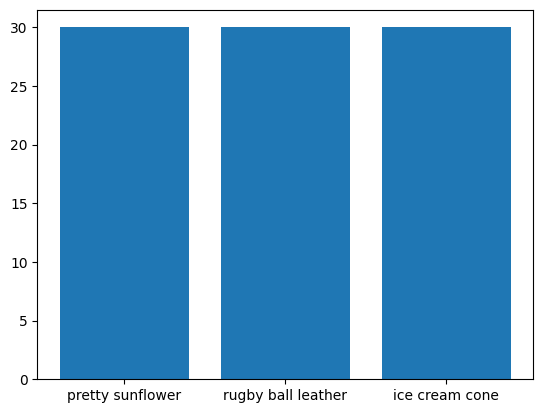

time: 193 ms (started: 2023-12-07 17:26:24 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts = True)
plt.bar(CATEGORIES,count)

In [ ]:
# Split data into Training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state = 109)

time: 15.7 ms (started: 2023-12-07 17:49:20 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {
        'C':[1,10,100,1000],'kernel':['linear']
    },
    {
        'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']
    }
]

svc = svm.SVC(probability= True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 47.2 s (started: 2023-12-07 17:52:01 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 0, 0, 1])

time: 152 ms (started: 2023-12-07 17:55:28 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 9.26 ms (started: 2023-12-07 17:55:38 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8148148148148148

time: 13 ms (started: 2023-12-07 17:56:53 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[7, 1, 2],
       [1, 9, 0],
       [0, 1, 6]])

time: 5.92 ms (started: 2023-12-07 18:00:00 +00:00)


In [ ]:
# Save the movel using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 83.2 ms (started: 2023-12-07 18:22:54 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 13.6 ms (started: 2023-12-07 18:22:59 +00:00)


Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/4/40/Sunflower_sky_backdrop.jpg
(1555, 1404, 3)
Predicted output: pretty sunflower


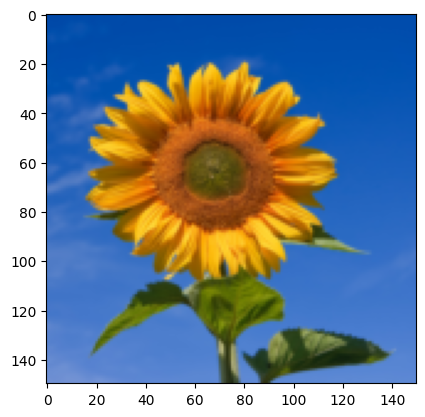

time: 4.91 s (started: 2023-12-07 18:33:46 +00:00)


In [ ]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output: {y_out}')
